In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_ds="/content/drive/MyDrive/Gender Classification/Training"
test_ds="/content/drive/MyDrive/Gender Classification/Validation"

# Data preprocessing
****

In [7]:
root_path = "/content/drive/MyDrive/Gender Classification/Training/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['Female', 'Male']
female : 1225 
male : 1358


In [8]:
os.listdir('/content/drive/MyDrive/Gender Classification/Training')

['Female', 'Male']

In [9]:
import plotly.express as px

In [10]:
fig = px.pie(names=class_names, values=class_dis,
             title="Training Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [11]:
valid_path = "/content/drive/MyDrive/Gender Classification/Validation/"
valid_dis = [len(os.listdir(valid_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [12]:
batch_size=32
img_size=224

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2583 images belonging to 2 classes.
Found 1102 images belonging to 2 classes.


In [14]:
train_generator.class_indices

{'Female': 0, 'Male': 1}

In [15]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [16]:
img= train_generator[0]
print(img)

(array([[[[0.5040594 , 0.40226945, 0.20232642],
         [0.5040594 , 0.40226945, 0.20232642],
         [0.5040594 , 0.40226945, 0.20232642],
         ...,
         [0.5140117 , 0.388683  , 0.22795877],
         [0.42716613, 0.30167595, 0.14100556],
         [0.4390231 , 0.3120372 , 0.1483754 ]],

        [[0.3803922 , 0.2901961 , 0.09411766],
         [0.3803922 , 0.2901961 , 0.09411766],
         [0.3803922 , 0.2901961 , 0.09411766],
         ...,
         [0.3522524 , 0.23788033, 0.0812331 ],
         [0.40784317, 0.28235295, 0.12941177],
         [0.41233027, 0.28534433, 0.12941177]],

        [[0.38244587, 0.2915652 , 0.09685588],
         [0.38244587, 0.2915652 , 0.09685588],
         [0.38244587, 0.2915652 , 0.09685588],
         ...,
         [0.34867173, 0.23502187, 0.07905918],
         [0.4133196 , 0.28919852, 0.1369419 ],
         [0.4154569 , 0.289579  , 0.13459207]],

        ...,

        [[0.23529413, 0.11764707, 0.        ],
         [0.23529413, 0.11764707, 0.        

In [17]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [18]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


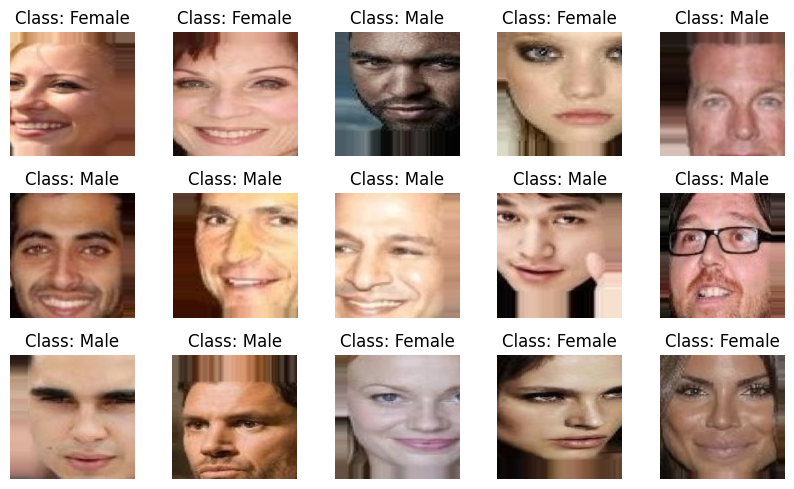

In [19]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (10 , 10))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [20]:
print(len(train_generator))
print(len(test_ds))

81
55


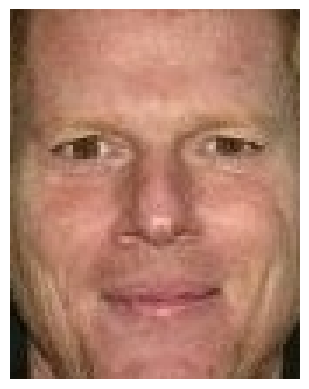

In [21]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/Gender Classification/Training/Male/090550.jpg.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
from keras.layers import MaxPool2D

# Build MobileNet Model

In [23]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

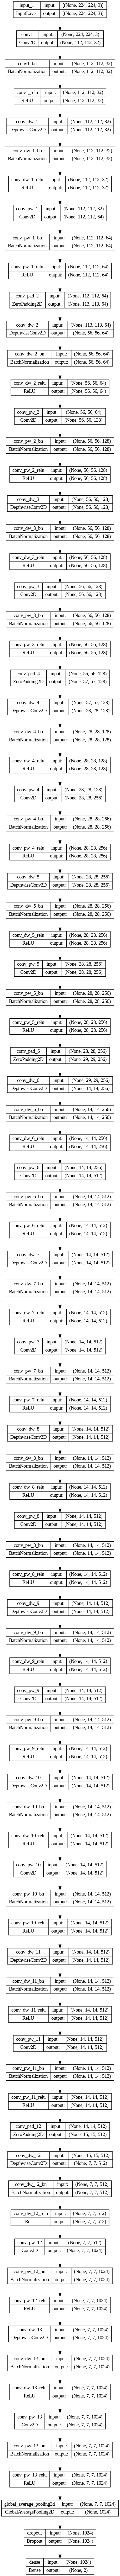

In [24]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes = 11

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [25]:
model = mobilenet((224, 224, 3))

In [26]:
# Print the model summary

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [29]:
mcp = ModelCheckpoint("gcmodel.h5", monitor="val_accuracy", save_best_only=True, mode="max")
history =model.fit(train_generator, validation_data=test_generator, epochs=15,  callbacks= [mcp])

Epoch 1/15
81/81 [==============================] - 834s 10s/step - loss: 0.7747 - accuracy: 0.6349 - val_loss: 0.9020 - val_accuracy: 0.5163
Epoch 2/15
81/81 [==============================] - 40s 496ms/step - loss: 0.5962 - accuracy: 0.7371 - val_loss: 0.9616 - val_accuracy: 0.5281
Epoch 3/15
81/81 [==============================] - 42s 519ms/step - loss: 0.4695 - accuracy: 0.8037 - val_loss: 0.6106 - val_accuracy: 0.7051
Epoch 4/15
81/81 [==============================] - 40s 494ms/step - loss: 0.4195 - accuracy: 0.8149 - val_loss: 0.3190 - val_accuracy: 0.8621
Epoch 5/15
81/81 [==============================] - 42s 514ms/step - loss: 0.3526 - accuracy: 0.8552 - val_loss: 0.2564 - val_accuracy: 0.8911
Epoch 6/15
81/81 [==============================] - 41s 510ms/step - loss: 0.3422 - accuracy: 0.8602 - val_loss: 0.2250 - val_accuracy: 0.9047
Epoch 7/15
81/81 [==============================] - 41s 511ms/step - loss: 0.3176 - accuracy: 0.8703 - val_loss: 0.2132 - val_accuracy: 0.9165


In [30]:
!cp /content/gcmodel.h5 /content/drive/MyDrive

In [31]:
from keras.models import load_model
final_model=load_model("/content/drive/MyDrive/gcmodel.h5")

In [32]:
n_categories = len(os.listdir('/content/drive/MyDrive/Gender Classification/Validation'))# number of categories print(n_categories)

In [33]:
n_categories

2

In [34]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.774690,0.634921,0.902026,0.516334
1,0.596205,0.737127,0.961619,0.528131
2,0.469482,0.803717,0.610607,0.705082
3,0.419507,0.814944,0.319037,0.862069
4,0.352564,0.855207,0.256441,0.891107


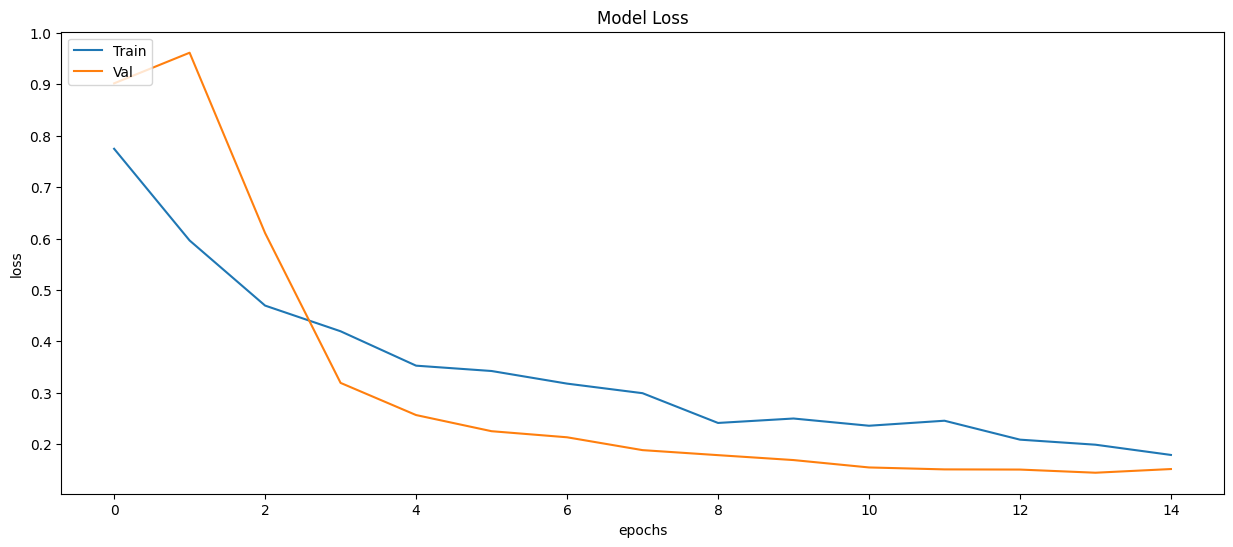

In [35]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

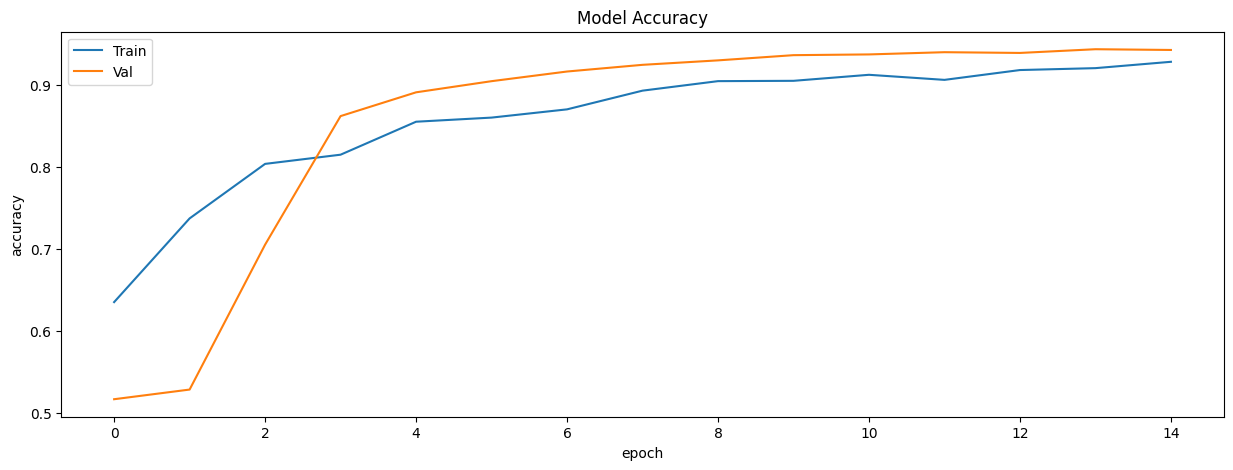

In [36]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [37]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

35/35 [==============================] - 3s 73ms/step


In [38]:
y_pred_1

array([0, 0, 1, ..., 1, 1, 1])

In [39]:
results =model.evaluate(test_generator)

35/35 [==============================] - 3s 81ms/step - loss: 0.1514 - accuracy: 0.9428


In [40]:
results

[0.15135467052459717, 0.9428312182426453]

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       348
           1       0.97      0.95      0.96       754

    accuracy                           0.94      1102
   macro avg       0.93      0.94      0.93      1102
weighted avg       0.94      0.94      0.94      1102



In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgs=['/content/drive/MyDrive/Gender Classification/Validation/Male/063460.jpg.jpg','/content/drive/MyDrive/Gender Classification/Validation/Female/113793.jpg.jpg',
      '/content/drive/MyDrive/Gender Classification/Validation/Female/113688.jpg.jpg','/content/drive/MyDrive/Gender Classification/Validation/Female/113707.jpg.jpg',
      '/content/drive/MyDrive/Gender Classification/Validation/Male/063500.jpg.jpg','/content/drive/MyDrive/Gender Classification/Validation/Male/063479.jpg.jpg']

images_test=[]
y1=[]

def read(img_path):
# Load and resize the image
  img = cv2.imread(img_path)
  resized_img = cv2.resize(img, (224, 224))

# Convert BGR to RGB
  resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB) /255.

  images_test.append(resized_img_rgb)
# Expand dimensions for model input
  expanded_img = np.expand_dims(resized_img_rgb, axis=0)
  y3 = model.predict(expanded_img)
  y1.append(y3)
for i in imgs:
  read(i)
# Make predictions using your model

print(y1)


1/1 [==============================] - 0s 23ms/step
[array([[0.0149773, 0.9850227]], dtype=float32), array([[0.9836961 , 0.01630388]], dtype=float32), array([[9.9999762e-01, 2.4316155e-06]], dtype=float32), array([[0.996316  , 0.00368396]], dtype=float32), array([[3.5549232e-04, 9.9964452e-01]], dtype=float32), array([[0.40291584, 0.5970842 ]], dtype=float32)]


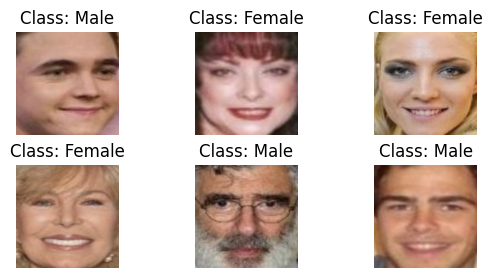

In [43]:
predicted_class = np.argmax(y1, axis=-1)
n=0
for i in predicted_class:
  if i == 0:
    class_name = 'Female'
  elif i == 1:
    class_name = 'Male'
  else:
    class_name = 'Unknown Class'
  plt.subplot(3 , 3, n+1)
  plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
  plt.imshow(images_test[n])
  plt.title('Class: '+class_name)
  plt.axis("off")
  n+=1


In [44]:
model = final_model
predictions = model.predict(test_generator, steps=test_generator.n // test_generator.batch_size + 1)

y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)  # for multi-class

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# or
y_pred = (predictions > 0.5).astype("int32")  # for binary class

35/35 [==============================] - 3s 80ms/step
Precision: 0.96
Recall: 0.95
F1 Score: 0.96
